# Linear Regression


The linear model assumes that the relationship between input and output is linear, or that the linear model is a reasonable approximation.

The linear model states that for p number of features, an output y can be predicted using a linear model:

$$\hat{y} = \hat{\beta_0} + \sum_{j=1}^{p} x_j \hat{\beta_j}$$ 

where $\hat{\beta_0}$ is bias or intercept and the $\beta_j$s are unknown parameters or coefficients.

To represent the above equation in vector form, for **a single** training example:

$$\hat{y} = \hat{\beta_0} +
            \begin{bmatrix}
               x_{1} &
               x_{2} &
               ... &
               x_{p}
            \end{bmatrix}
            \begin{bmatrix}
                \hat{\beta_1}\\
                \hat{\beta_2}\\
                \vdots \\
                \hat{\beta_p}
            \end{bmatrix}$$ 


The bias term $\hat{\beta_0}$ can conveniently incorporated by including constant 1 into matrix x, such that:

\begin{align}
x^T &= \begin{bmatrix}
       x_{1} &
       x_{2} &
       ... &
       x_{p}
     \end{bmatrix}
\end{align}

$$\downarrow$$

\begin{align}
x^T &= \begin{bmatrix}
       1 &
       x_{1} &
       x_{2} &
       ... &
       x_{p}
     \end{bmatrix}
\end{align} 

$\hat{\beta_0}$ bias can be included into the vector of coefficients $\hat{\beta}$ to form:

\begin{equation*} 
    \hat{\beta} = \begin{bmatrix}
                    \hat{\beta_0}\\
                    \hat{\beta_1}\\
                    \hat{\beta_2}\\
                    \vdots \\
                    \hat{\beta_p}
                   \end{bmatrix}
\end{equation*}

$$\therefore\hat{y} = \begin{bmatrix}
               1 &
               x_{1} &
               x_{2} &
               ... &
               x_{p}
             \end{bmatrix}
            \begin{bmatrix}
                \hat{\beta_0}\\
                \hat{\beta_1}\\
                \hat{\beta_2}\\
                \vdots \\
                \hat{\beta_p}
            \end{bmatrix}$$ 
 


For an entire training set of **N** training examples:

$$ \begin{bmatrix}
       \hat{y_{0}} \\
       \hat{y_{1}} \\
       \hat{y_{2}} \\
       \vdots \\
       \hat{y_{n}}
   \end{bmatrix} =
   \begin{bmatrix}
       1 & x_{1,1} & x_{1,2} & ... & x_{1,p} \\
       1 & x_{2,1} & x_{2,2} & ... & x_{2,p} \\
       1 & x_{3,1} & x_{3,2} & ... & x_{3,p} \\
       \vdots  & \vdots  & \vdots & \ddots & \vdots  \\
       1 & x_{n,1} & x_{n,2} & ... & x_{n,p} \\
    \end{bmatrix}
    \begin{bmatrix}
        \hat{\beta_0}\\
        \hat{\beta_1}\\
        \hat{\beta_2}\\
        \vdots \\
        \hat{\beta_p}
    \end{bmatrix}$$ 
            

In general, the predicted output ($\hat{y}$) can be rewritten as:

$$\hat{Y} = X^T \beta$$

How do we fit a linear model to a set of **labeled** training data ($x_1, y_1$) to ($x_n, y_n$)?

One method is to make $\hat{y}$ as close to $y$ as possible (i.e make the predicted outputs as close to the target outputs) for the training examples we have.

## Least Squares Method


The goal is to select the coefficients $\beta$ is selected to minimise the residual sum of squares or the cost function J:

\begin{equation}
    J(\beta) = \frac{1}{2N} (X^T \beta - Y)^2 \label{eq:1}\tag{1}
\end{equation}

$\frac{1}{2}$ is conveniently added to the front of the equation as the derivative w.r.t beta will give a constant 2, which will be canceled out when multiplied with $\frac{1}{2}$.

1/N so that the mean of the errors are taken.

## Gradient Descent

\begin{equation}
\beta_j := \beta_j - \alpha \frac{\partial}{\partial \beta_j} J(\beta) \label{eq:2}\tag{2}
\end{equation}


Minimising the cost function $J(\beta)$ first starts by randomly initialising $\beta$ values.

Following that,  $\beta$ is changed repeatedly over some number of iterations with the goal of making $J(\beta)$ smaller each iteration.

The algorithm terminates when:
1. the number of iterations is reached, or 
2. $J(\beta)$ does not improve (whichever comes first). 

In the latter case, a minimum point has been reached.

This is performed for all values of j, depending on the number of inputs: so all $\beta_0$ to $\beta_p$ will be tuned

$\alpha$ represents the learning rate, or the step length that is used between each update.

For one training example, substitute (1) into the (2) and compute the first-order derivative:

\begin{align}
    \beta_j &:= \beta_j - \alpha \frac{\partial}{\partial \beta_j} J(\beta)  \\
            &:= \beta_j - \alpha \frac{\partial}{\partial \beta_j}\left( \frac{1}{2} (x^T \beta - y)^2  \right)\\
            &:= \beta_j - \alpha\left( 2 * \frac{1}{2} (x^T \beta - y) * \frac{\partial}{\partial \beta_j} (x^T \beta - y)  \right)\\
            &:= \beta_j - \alpha\left( (x^T \beta - y) * \frac{\partial}{\partial \beta_j} (x^T \beta - y) \right) \\
            &:= \beta_j - \alpha\left( (x^T \beta - y) * x^T_j \right) \\
            &:= \beta_j + \alpha\left( (y - x^T \beta) * x^T_j \right) 
\end{align}

This update is performed simultaneously for all values of j, where j ranges from 1 to p for each of the input variables.

In general, for **N** number of training examples:

\begin{align}
    \beta_j := \beta_j + \alpha\sum_{i=1}^{N}\left( (y_i - x^T_i \beta) * x^T_j \right) \label{eq:3}\tag{3}
\end{align}

### Batch Gradient Descent (BGD)

* Updates weights only after scanning through entire training set. 

* Costly for large number of samples.

Repeat until convergence or number of iterations reached for each feature (j) {

\begin{equation}
    \beta_j := \beta_j + \alpha\sum_{i=1}^{N}\left( (y_i - x^T_i \beta) * x^T_j \right)
\end{equation} 

}

### Using Normal Equations

From (3), $\frac{\partial}{\partial \beta_j} J(\beta)$ can be rewritten in vector form as:

\begin{align}
    \frac{\partial}{\partial \beta_j} J(\beta) &=  (Y - X^T \beta) * X^T_j \\
                                               &=  X^T_j Y - X^T X^T_j \beta \\
\end{align}

To minimise $J(\beta)$, we set derivatives $\frac{\partial}{\partial \beta_j} J(\beta)$ to 0:

\begin{align}
    0 &=  X^T_j Y - X^T X^T_j \beta\\
    X^T_j Y &= X^T X^T_j \beta \\
    \beta &= (X^T X^T_j)^{-1} X^T_j Y
\end{align}

In [1]:
#Import libraries
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt

#Validation purposes
from sklearn.linear_model import LinearRegression

In [2]:
import math

class Linear_Regression():
    
    def __init__(self, n_iterations=100, learning_rate=0.001, threshold=1e-6):
        self.n_iterations = n_iterations
        self.learning_rate = learning_rate
        self.threshold = threshold
        
    def initialize_weights(self, n_features):
        np.random.seed(123)
        self.w = np.random.rand(n_features)

    def fit(self, X, y):
        
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)
        
        #List of training errors for visualization
        self.training_errors = []
        
        #Initialise weights randomly, number of features should be the number of columns of X
        self.initialize_weights(n_features=X.shape[1])

        # Gradient descent for n_iterations
        # Batch gradient descent: Calculate errors for all training examples, then update weights
        for i in range(self.n_iterations):
            
            y_pred = X.dot(self.w)
            
            # Calculate error
            mse = np.mean(0.5 * (y - y_pred)**2)
            
            #Append errors to error list
            self.training_errors.append(mse)
            
            # Gradient of l2 loss w.r.t w
            grad_w = -(y - y_pred).dot(X)
            
            # Update the weights
            self.w -= self.learning_rate * grad_w
            
            #If difference in MSE does not change pass a set threshold, break out of training
            if len(self.training_errors) > 1: #More than one MSE recorded
                if (self.training_errors[-2] - self.training_errors[-1]) <= self.threshold:
                    break

    def predict(self, X):
        
        # Insert constant ones for bias weights
        X = np.insert(X, 0, 1, axis=1)
        y_pred = X.dot(self.w)
        return y_pred

In [3]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=100, n_features=1, noise=30)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

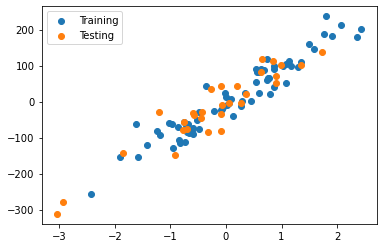

In [4]:
plt.scatter(X_train, y_train, label = "Training")
plt.scatter(X_test, y_test, label = "Testing")
plt.legend()
plt.show()

In [5]:
#Build model
#Configure learning rate and number of iterations accordingly
model = Linear_Regression(n_iterations = 1000, learning_rate=0.001)

#Train
#Use training data to find best weights that minimises cost function
model.fit(X_train, y_train)

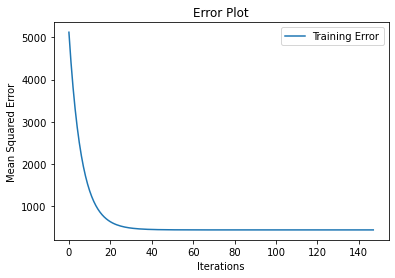

In [6]:
# Training error plot
n = len(model.training_errors)
plt.plot(range(n), model.training_errors, label="Training Error")
plt.legend()
plt.title("Error Plot")
plt.ylabel('Mean Squared Error')
plt.xlabel('Iterations')
plt.show()

In [7]:
def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred)**2)
    return mse

#Based on trained weights, predict test set
y_pred = model.predict(X_test)

#Error between predicted outputs and target values
mse = mean_squared_error(y_test, y_pred)
print ("Mean squared error: %s" %mse)

Mean squared error: 1278.257191905179


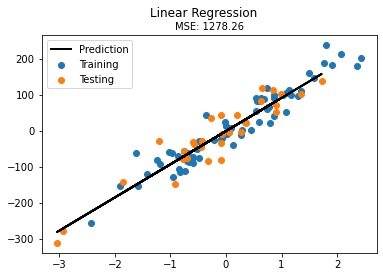

In [8]:
# Plot the results
plt.scatter(X_train, y_train, label = "Training")
plt.scatter(X_test, y_test, label = "Testing")

#Plot prediction line for test set
plt.plot(X_test, y_pred, color='black', linewidth=2, label="Prediction")
plt.legend()
plt.suptitle("Linear Regression")
plt.title("MSE: %.2f" % mse, fontsize=10)
plt.show()

In [9]:
sk_model = LinearRegression()

sk_model.fit(X_train, y_train)

LinearRegression()

In [10]:
sk_pred = sk_model.predict(X_test)
mse_sk = mean_squared_error(y_test, sk_pred)
print ("Mean squared error: %s" %mse_sk)

Mean squared error: 1278.272468292074


Comparable results achieved with sklearn MSE.

Changing the number of iterations of gradient descent will change the MSE.

### References
[1] CS229 Stanford University Notes. By Andrew Ng 

[2] ML-From-Scratch. https://github.com/eriklindernoren/ML-From-Scratch

[3] Elements of Statistical Learning. By Jerome H. Friedman, Robert Tibshirani, and Trevor Hastie

